# FlowDenoising User Manual

FlowDenoising is a low-pass filtering tool for volumetric data. A 1D Gaussian filter is applied to each dimension Z, Y and X (in this order), resulting in a 3D filtering. Unlike classical Gaussian filtering, the 2D slices (in each dimension) are aligned to minimize the smoothing of the structures "recognized" by the Optical Flow (OF) estimator.

## 1. Installing the required packages

In [1]:
!pip install -r ../src/requirements.txt

In [2]:
# Delete temporal files, if any
!rm -f *.mrc *.tif

In [3]:
import cv2
import numpy as np
from matplotlib.pyplot import figure

## 2. Denoising using the default parameters

The default parameters are:

In [8]:
# Be sure that you run this notebook from the "manual" folder.
!python ../src/flowdenoising.py -h

Python version = 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
usage: flowdenoising.py [-h] [-i INPUT] [-o OUTPUT] [-s SIGMA [SIGMA ...]]
                        [-l LEVELS] [-w WINSIZE] [-v VERBOSITY] [-n] [-m]
                        [-p NUMBER_OF_PROCESSES] [--recompute_flow]
                        [--show_fingerprint]

3D Gaussian filtering controlled by the optical flow.

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        Input a MRC-file or a multi-image TIFF-file (default:
                        ./volume.mrc)
  -o OUTPUT, --output OUTPUT
                        Output a MRC-file or a multi-image TIFF-file (default:
                        ./denoised_volume.mrc)
  -s SIGMA [SIGMA ...], --sigma SIGMA [SIGMA ...]
                        Gaussian sigma for each dimension in the order (Z, Y,
                        X) (default: (2.0, 2.0, 2.0))
  -l LEVELS, --levels LEVELS
                        Number of levels 

In [9]:
!ls ../src

20_CPUs.txt		 flowdenoising-main.py~       requirements.txt
big_vol.mrc		 flowdenoising.py	      shared_code.py~
CPU.txt			 flowdenoising_sequential.py  small_vol.mrc
Dockerfile~		 flowdenoising-windows.py     stress_me.sh
flowdenoising_class.py	 GPU.txt		      stress_me.sh~
flowdenoising_class.py~  pamper_me.sh		      test_me.sh
flowdenoising_GPU2.py~	 __pycache__		      TS_026.mrc


### Download a (small) volume
This example uses a 32x256x256 (Z, Y, X) crop of the [EMPIAR-10311](https://www.ebi.ac.uk/empiar/EMPIAR-10310/) volume.

In [10]:
%%bash
OUTPUT_FILENAME="small_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB"
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O $OUTPUT_FILENAME 2> /dev/null
fi

In [11]:
!ls -l *.mrc

-rw-rw-r-- 1 vruiz vruiz 8389632 jun 12  2022 small_vol.mrc


### Filter a [MRC](https://en.wikipedia.org/wiki/MRC_(file_format)) file

In [12]:
%%time
!python ../src/flowdenoising.py -i small_vol.mrc -o denoised_vol.mrc -v 1

Python version = 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
[2023-08-16 11:41:23,164] (INFO) Verbosity level = 1
[2023-08-16 11:41:23,164] (INFO) Using adjacent OF fields as predictions
[2023-08-16 11:41:23,164] (INFO) Number of processing units: 20
[2023-08-16 11:41:23,164] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-08-16 11:41:23,164] (INFO) reading "small_vol.mrc"
[2023-08-16 11:41:23,169] (INFO) read "small_vol.mrc" in 0.005431803991086781 seconds
[2023-08-16 11:41:23,169] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:23,170] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:23,170] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:23,170] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-08-16 11:41:23,170] (INFO) Number of available processing units: 20
[2023-08-16 11:41:23,170] (INFO) Number of concurrent processes: 20
[2023-08-16 11:41:23,170] (INFO) Filtering ...
[2023-08-16 11:41:23,170] (INFO) small_vol.mrc type =

In [13]:
!ls -l *.mrc

-rw-rw-r-- 1 vruiz vruiz 8389632 ago 16 11:41 denoised_vol.mrc
-rw-rw-r-- 1 vruiz vruiz 8389632 ago 16 11:41 small_vol.mrc


### Filter a multi-page [TIFF](https://en.wikipedia.org/wiki/TIFF) file

In [14]:
%%time
!python ../src/flowdenoising.py -i small_vol.mrc -o denoised_vol.tif -v 1

Python version = 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
[2023-08-16 11:41:31,208] (INFO) Verbosity level = 1
[2023-08-16 11:41:31,208] (INFO) Using adjacent OF fields as predictions
[2023-08-16 11:41:31,208] (INFO) Number of processing units: 20
[2023-08-16 11:41:31,208] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-08-16 11:41:31,208] (INFO) reading "small_vol.mrc"
[2023-08-16 11:41:31,214] (INFO) read "small_vol.mrc" in 0.005834887007949874 seconds
[2023-08-16 11:41:31,214] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:31,214] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:31,214] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:31,215] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-08-16 11:41:31,215] (INFO) Number of available processing units: 20
[2023-08-16 11:41:31,215] (INFO) Number of concurrent processes: 20
[2023-08-16 11:41:31,215] (INFO) Filtering ...
[2023-08-16 11:41:31,215] (INFO) small_vol.mrc type =

In [15]:
!ls -l *.tif

-rw-rw-r-- 1 vruiz vruiz 8394398 ago 16 11:41 denoised_vol.tif


### Filtering without optical flow (OF) compensation

In [16]:
%%time
!python ../src/flowdenoising.py -i small_vol.mrc -o no_OF_denoised_vol.tif --no_OF -v 1

Python version = 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
[2023-08-16 11:41:43,646] (INFO) Verbosity level = 1
[2023-08-16 11:41:43,646] (INFO) Using adjacent OF fields as predictions
[2023-08-16 11:41:43,646] (INFO) Number of processing units: 20
[2023-08-16 11:41:43,646] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-08-16 11:41:43,646] (INFO) reading "small_vol.mrc"
[2023-08-16 11:41:43,651] (INFO) read "small_vol.mrc" in 0.005117280001286417 seconds
[2023-08-16 11:41:43,651] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:43,652] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:43,652] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:41:43,652] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-08-16 11:41:43,652] (INFO) Number of available processing units: 20
[2023-08-16 11:41:43,652] (INFO) Number of concurrent processes: 20
[2023-08-16 11:41:43,652] (INFO) Filtering ...
[2023-08-16 11:41:43,652] (INFO) small_vol.mrc type =

In [17]:
!ls -l *.tif

-rw-rw-r-- 1 vruiz vruiz 8394398 ago 16 11:41 denoised_vol.tif
-rw-rw-r-- 1 vruiz vruiz 8394398 ago 16 11:41 no_OF_denoised_vol.tif


### Compare

In [18]:
import skimage.io
import mrcfile
vol_MRC = mrcfile.open("small_vol.mrc")
vol = vol_MRC.data
denoised_vol = skimage.io.imread("denoised_vol.tif", plugin="tifffile")
no_OF_denoised_vol = skimage.io.imread("no_OF_denoised_vol.tif", plugin="tifffile")

In [19]:
try:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
except:
    !pip install matplotlib
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

<IPython.core.display.Math object>

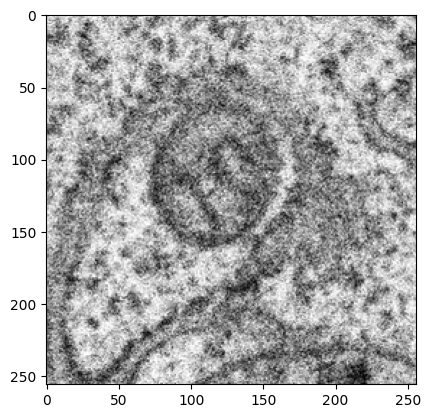

In [20]:
from IPython.display import display, Math
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[15], cmap="gray")

<IPython.core.display.Math object>

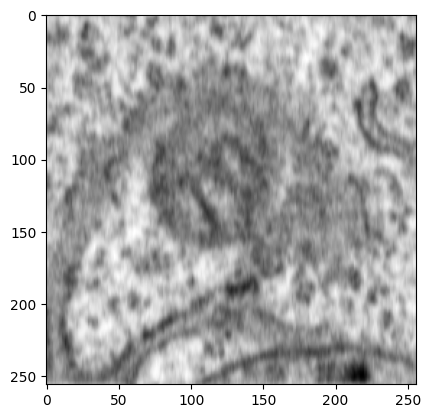

In [22]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_denoised_vol[15], cmap="gray")

<IPython.core.display.Math object>

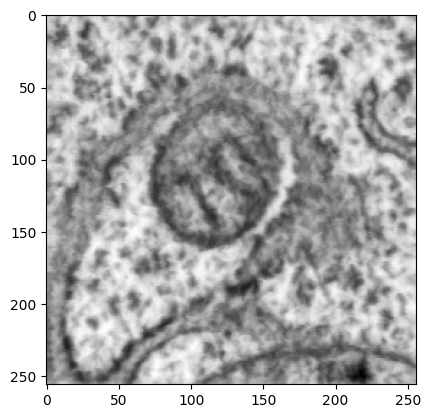

In [21]:
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma=2):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

## 2. Controlling the length of the filters with parameters $\sigma$

### Example for $\sigma_\text{Z}=1.0, \sigma_\text{Y}=2.0~\text{and}~\sigma_\text{X}=0.1$
If $0<\sigma\le 0.1$, then no filtering is performed in the corresponding direction.

In [23]:
%%time
!python ../src/flowdenoising.py -i small_vol.mrc -o denoised_small_vol.mrc -s 1.0 2.0 0.1 -v 1 2>&1 | grep length

[2023-08-16 11:42:01,271] (INFO) length of each filter (Z, Y, X) = [9, 17, 1]
[2023-08-16 11:42:01,275] (INFO) Filtering along Z with kernel length=9
[2023-08-16 11:42:01,676] (INFO) Filtering along Y with kernel length=17
[2023-08-16 11:42:02,361] (INFO) Filtering along X with kernel length=1
CPU times: user 12.8 ms, sys: 9.32 ms, total: 22.1 ms
Wall time: 1.47 s


<IPython.core.display.Math object>

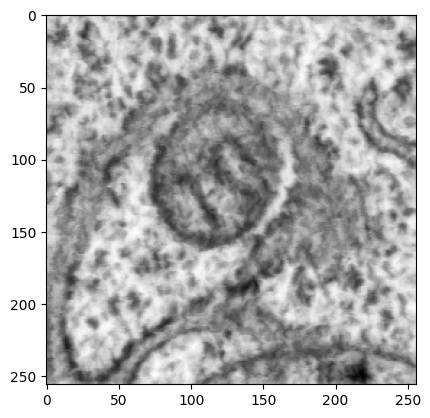

In [24]:
denoised_vol_MRC = mrcfile.open("denoised_small_vol.mrc")
denoised_vol = denoised_vol_MRC.data
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma_{\mathrm{Z}}=1.0, \sigma_{\mathrm{Y}}=2.0~\mathrm{and}~\sigma_{\mathrm{X}}=0.1):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

## 3. Controlling the search area with the parameter `l`

In [25]:
%%time
!python ../src/flowdenoising.py -i small_vol.mrc -o denoised_small_vol_l0.mrc -l 0 -v 1 2>&1 | grep "l="

CPU times: user 33.7 ms, sys: 3.89 ms, total: 37.6 ms
Wall time: 2.71 s


In [26]:
%%time
!python ../src/flowdenoising.py -i small_vol.mrc -o denoised_small_vol_l3.mrc -l 3 -v 1 2>&1 | grep "l="

CPU times: user 34 ms, sys: 8.88 ms, total: 42.9 ms
Wall time: 2.91 s


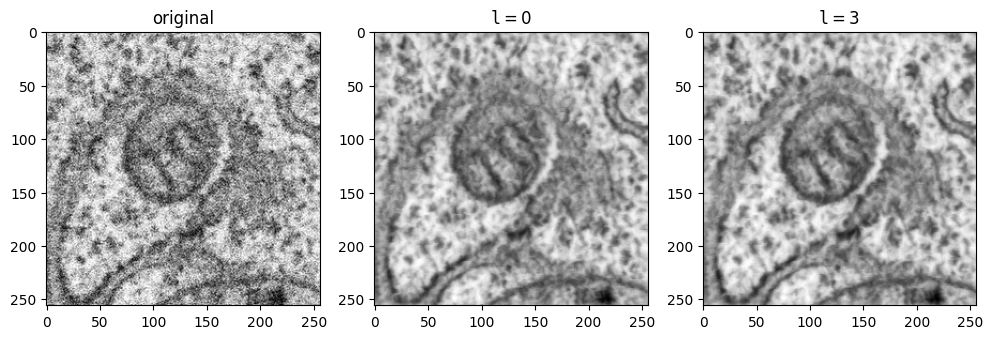

In [27]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l0.mrc")
denoised_vol_l0 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{l}=0$")
imgplot = plt.imshow(denoised_vol_l0[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l3.mrc")
denoised_vol_l3 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{l}=3$")
imgplot = plt.imshow(denoised_vol_l3[15], cmap="gray")

## 4. Controlling the sensitivity to noise with the parameter `w`

In [28]:
%%time
!python ../src/flowdenoising.py -i small_vol.mrc -o denoised_small_vol_w3.mrc -w 3 -v 1 2>&1 | grep "w="

CPU times: user 24.3 ms, sys: 17.3 ms, total: 41.6 ms
Wall time: 2.93 s


In [29]:
%%time
!python ../src/flowdenoising.py -i small_vol.mrc -o denoised_small_vol_w17.mrc -w 17 -v 1 2>&1 | grep "w="

CPU times: user 37.4 ms, sys: 3.65 ms, total: 41 ms
Wall time: 2.96 s


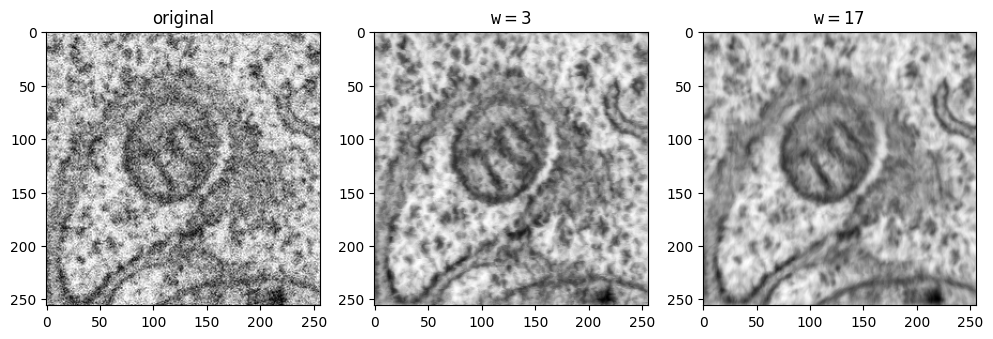

In [30]:
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w3.mrc")
denoised_vol_w3 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{w}=3$")
imgplot = plt.imshow(denoised_vol_w3[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w17.mrc")
denoised_vol_w17 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{w}=17$")
imgplot = plt.imshow(denoised_vol_w17[15], cmap="gray")

## 4. Using a ("big") volume

In [31]:
%%bash
OUTPUT_FILENAME="big_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_"
    wget --quiet --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $OUTPUT_FILENAME && rm -rf /tmp/cookies.txt 2> /dev/null
fi

In [32]:
vol_MRC = mrcfile.open("big_vol.mrc")
vol = vol_MRC.data
print("(Z_size, Y_size, X_size) =", vol.shape)

(Z_size, Y_size, X_size) = (100, 1024, 1024)


In [33]:
%%time
!python ../src/flowdenoising.py -i big_vol.mrc -o denoised_big_vol.mrc -v 1 -l 0

Python version = 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
[2023-08-16 11:43:06,180] (INFO) Verbosity level = 1
[2023-08-16 11:43:06,180] (INFO) Using adjacent OF fields as predictions
[2023-08-16 11:43:06,180] (INFO) Number of processing units: 20
[2023-08-16 11:43:06,180] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-08-16 11:43:06,180] (INFO) reading "big_vol.mrc"
[2023-08-16 11:43:06,402] (INFO) read "big_vol.mrc" in 0.22119980299612507 seconds
[2023-08-16 11:43:06,402] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:43:06,402] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:43:06,402] (INFO) Computing gaussian kernel with sigma=2.0
[2023-08-16 11:43:06,402] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-08-16 11:43:06,402] (INFO) Number of available processing units: 20
[2023-08-16 11:43:06,402] (INFO) Number of concurrent processes: 20
[2023-08-16 11:43:06,402] (INFO) Filtering ...
[2023-08-16 11:43:06,402] (INFO) big_vol.mrc type = float3

CPU times: user 1.26 s, sys: 242 ms, total: 1.5 s
Wall time: 1min 32s


In [34]:
%%time
!python ../src/flowdenoising.py -i big_vol.mrc -o no_OF_denoised_big_vol.mrc --no_OF 

Python version = 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
CPU times: user 134 ms, sys: 4.28 ms, total: 139 ms
Wall time: 5.82 s


In [35]:
denoised_vol_MRC = mrcfile.open("denoised_big_vol.mrc")
denoised_vol = denoised_vol_MRC.data
no_OF_denoised_vol_MRC = mrcfile.open("no_OF_denoised_big_vol.mrc")
no_OF_denoised_vol = no_OF_denoised_vol_MRC.data

<IPython.core.display.Math object>

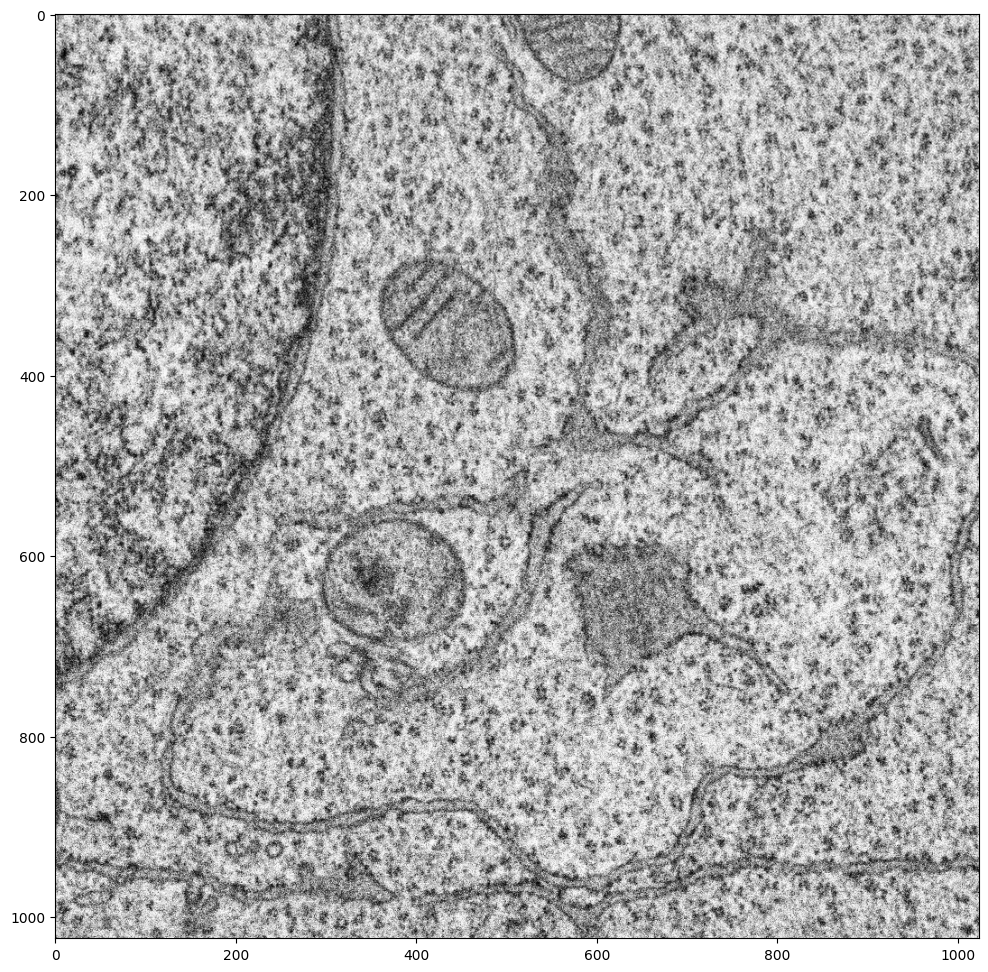

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

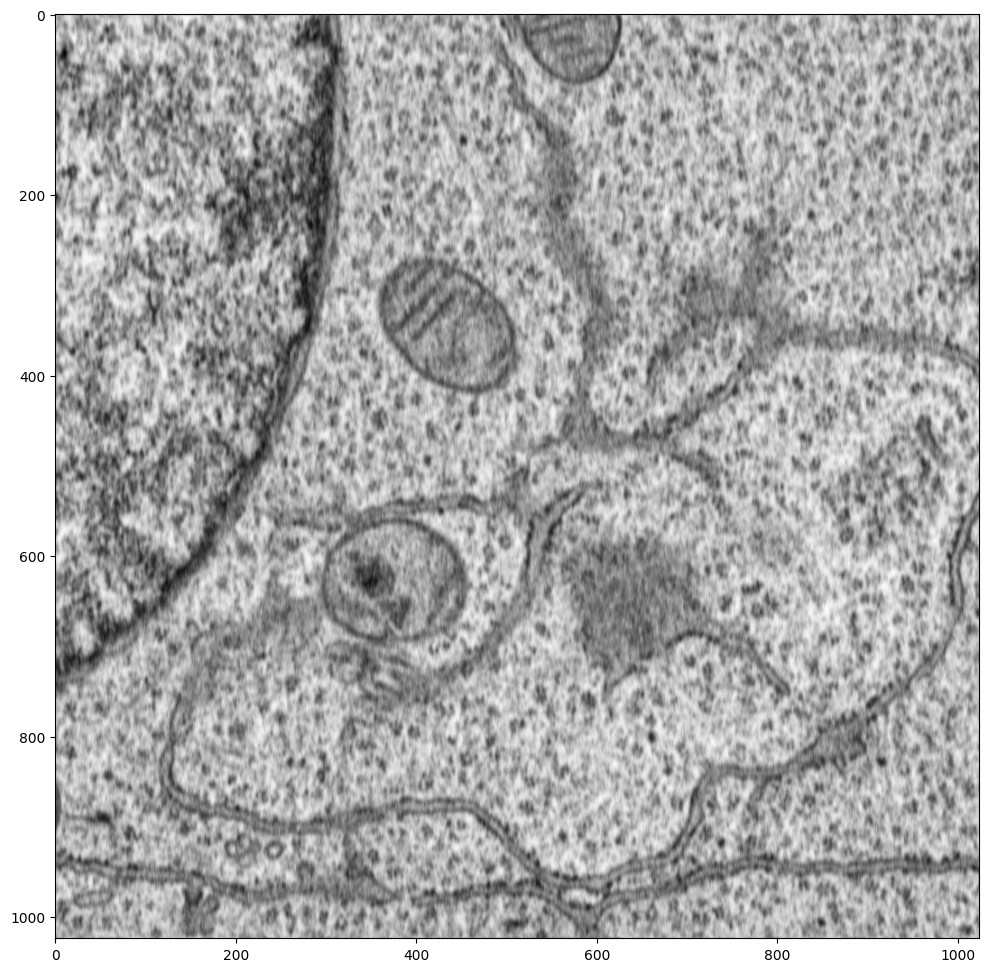

In [38]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(no_OF_denoised_vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

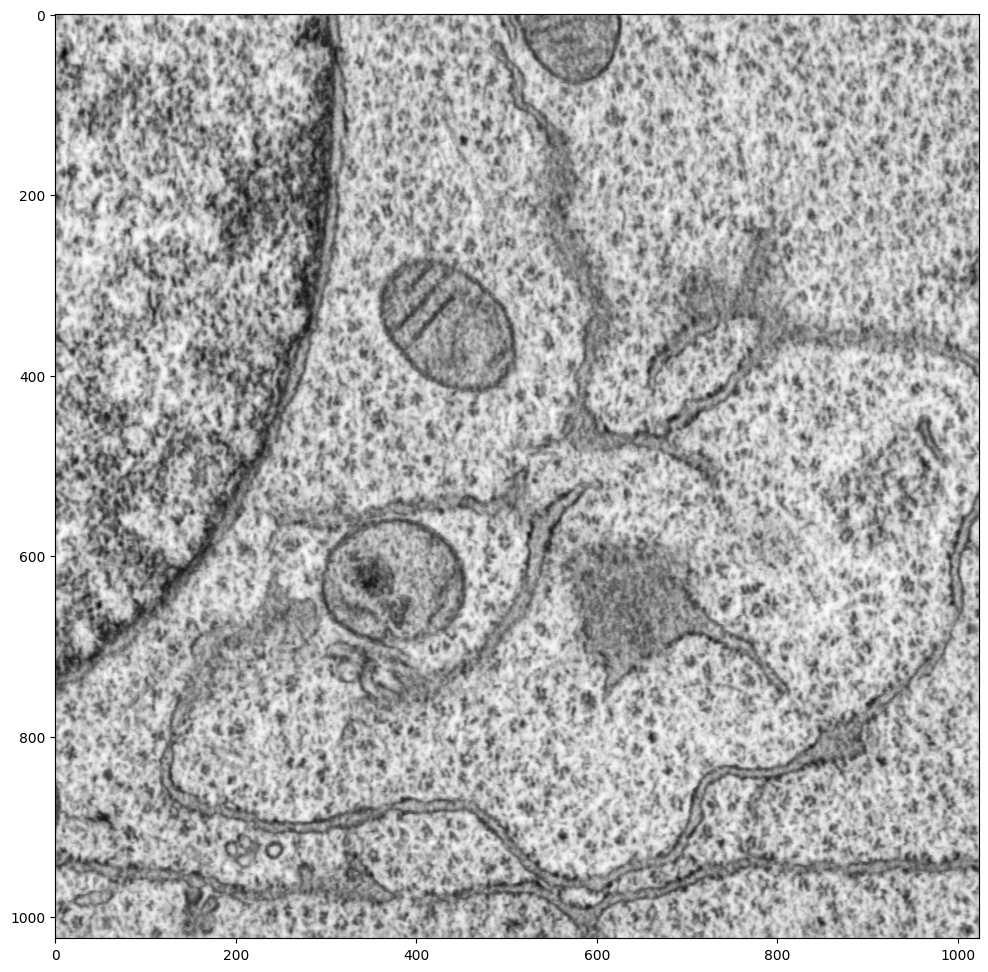

In [37]:
display(Math("\mathtt{Denoised~slice~using~OF}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(denoised_vol[vol.shape[0]//2], cmap="gray")